In [1]:
# import pandas as pd
# data = pd.read_csv('combined_data_05_with_gtbb.csv')
# data.head()
# print(len(data))





import pandas as pd
data = pd.read_csv('combined_data_05_with_gtbb_correct.csv')
data.head()
# print(len(data))

image_name        responses  majority_vote  agreement_ratio  \
0       boat_2008_000007  [1, 0, 1, 1, 1]              1              0.8   
1      horse_2008_000008  [1, 1, 1, 1, 1]              1              1.0   
2        cow_2008_000009  [1, 1, 1, 0, 1]              1              0.8   
3        dog_2008_000019  [1, 1, 1, 1, 1]              1              1.0   
4  aeroplane_2008_000021  [1, 1, 1, 1, 1]              1              1.0   

   model_detection  agreement      class  \
0                1       True       boat   
1                1       True      horse   
2                1       True        cow   
3                1       True        dog   
4                1       True  aeroplane   

                                       zip_file_path  
0  POETdataset.zip/POETdataset/PascalImages/boat_...  
1  POETdataset.zip/POETdataset/PascalImages/horse...  
2  POETdataset.zip/POETdataset/PascalImages/cow_2...  
3  POETdataset.zip/POETdataset/PascalImages/dog_2...  
4  POETdataset.zip/POETdataset/PascalImages/aerop...

In [2]:
# Filtered data where both are wrong
filtered_data_both_wrong = data[(data['model_detection'] == 0) & (data['majority_vote'] == 0)]
print(len(filtered_data_both_wrong))
both_wrong_out_path = 'both_wrong_05_gtbb.txt'
filtered_data_both_wrong['zip_file_path'].to_csv(both_wrong_out_path, index=False, header=False)

# Filtered data where both are right
filtered_data_both_right = data[(data['model_detection'] == 1) & (data['majority_vote'] == 1)]
print(len(filtered_data_both_right))
both_right_out_path = 'both_right_05_gtbb.txt'
filtered_data_both_right['zip_file_path'].to_csv(both_right_out_path, index=False, header=False)

# Filtered data where only the model is right
filtered_data_model_right = data[(data['model_detection'] == 1) & (data['majority_vote'] == 0)]
print(len(filtered_data_model_right))
model_right_out_path = 'model_right_05_gtbb.txt'
filtered_data_model_right['zip_file_path'].to_csv(model_right_out_path, index=False, header=False)

# Filtered data where only the humans are right
filtered_data_human_right = data[(data['model_detection'] == 0) & (data['majority_vote'] == 1)]
print(len(filtered_data_human_right))
human_right_out_path = 'human_right_05_gtbb.txt'
filtered_data_human_right['zip_file_path'].to_csv(human_right_out_path, index=False, header=False)

14
5340
692
85


In [3]:
filtered_data_both_ = data[(data['model_detection'] == 1) & (data['majority_vote'] == 0)]
# filtered_data_both_.head()

# General Ratios and how much the occupy

In [4]:
total_samples = len(data)
agreement_counts = data['agreement_ratio'].value_counts()
agreement_ratios = (agreement_counts / total_samples).reset_index()
agreement_ratios.columns = ['agreement_ratio', 'ratio']
print(agreement_ratios)

   agreement_ratio     ratio
0              1.0  0.746860
1              0.8  0.114826
2              0.4  0.110422
3              0.6  0.023161
4              0.2  0.003425
5              0.0  0.001305


# Images based on ratios

Loading: POETdataset/PascalImages/cat_2008_007164.jpg
Loading: POETdataset/PascalImages/sofa_2011_000550.jpg
Loading: POETdataset/PascalImages/boat_2009_002173.jpg
Loading: POETdataset/PascalImages/cat_2010_003174.jpg
Loading: POETdataset/PascalImages/dog_2010_003007.jpg
Loading: POETdataset/PascalImages/diningtable_2010_000178.jpg


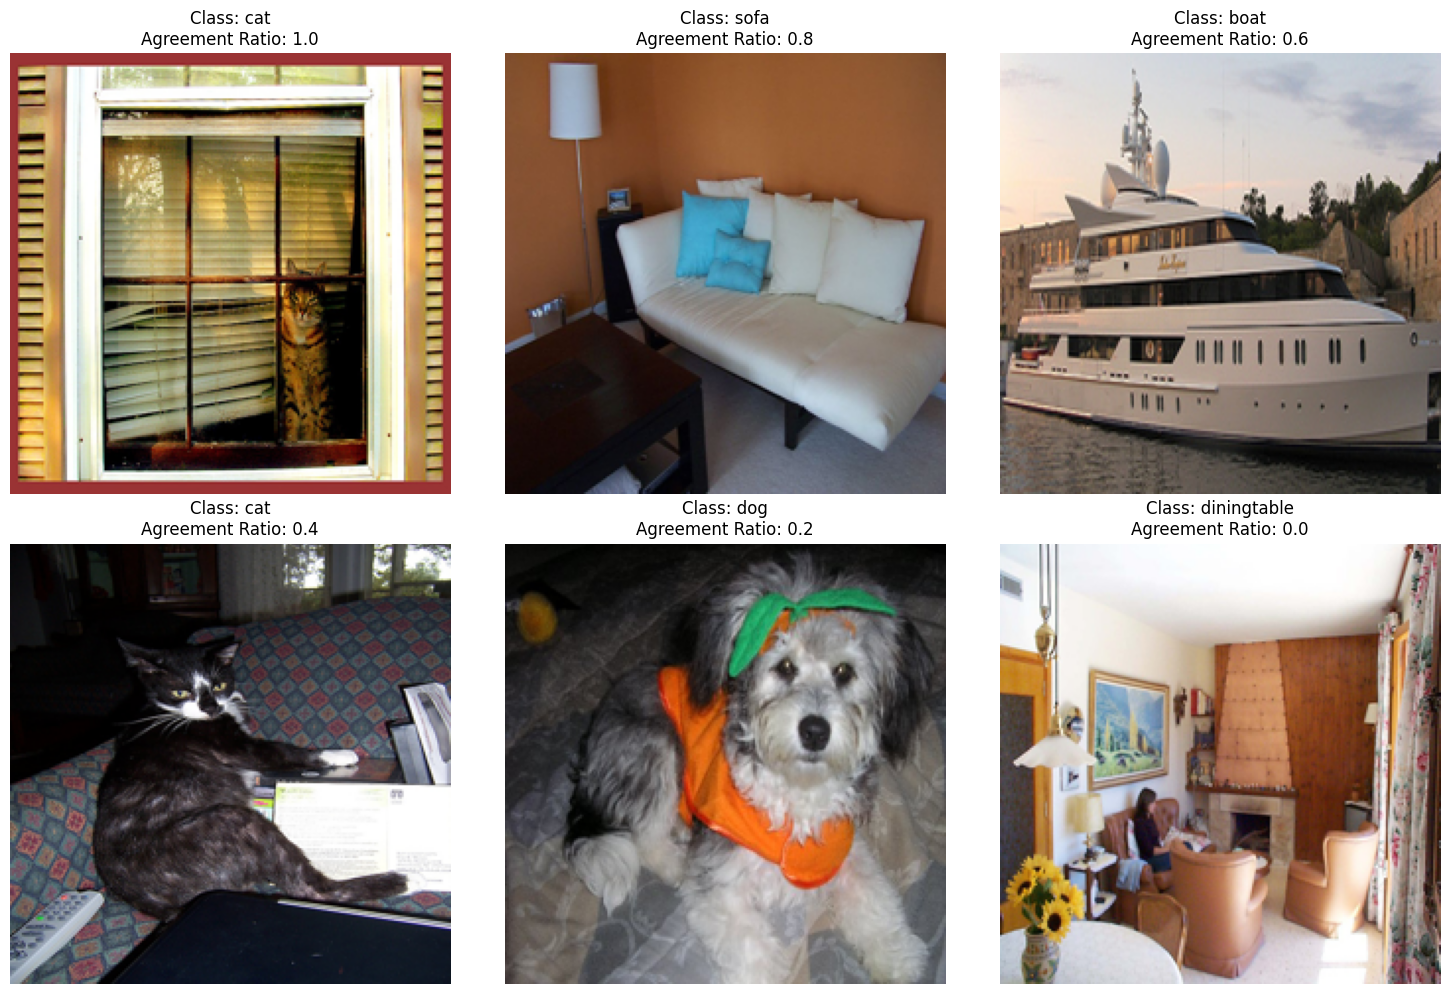

In [5]:
import zipfile
import random
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Path to the ZIP file
zip_file_path = "../POETdataset.zip"

# Clean up paths in the dataset (if necessary)
data['zip_file_path'] = data['zip_file_path'].str.replace('POETdataset.zip/', '', regex=False)

# Define the target size for resizing images
target_size = (224, 224)  # For example, 224x224 pixels

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Select six unique agreement ratios and random samples for each
    unique_ratios = agreement_ratios['agreement_ratio'].unique()
    selected_samples = []

    for ratio in sorted(unique_ratios, reverse=True)[:6]:  # Sort ratios descending and limit to 6
        # Filter images with the current ratio
        subset = data[data['agreement_ratio'] == ratio]
        # Randomly select one image
        random_sample = subset.sample(1).iloc[0]
        selected_samples.append(random_sample)

    # Sort the selected samples by their agreement ratio in descending order
    selected_samples.sort(key=lambda x: x['agreement_ratio'], reverse=True)

    # Plot the images in a 2x3 grid
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for ax, sample in zip(axes, selected_samples):
        # Load the image from the ZIP file
        img_path = sample['zip_file_path']
        print(f"Loading: {img_path}")  # Debug the path
        with z.open(img_path) as file:
            img_data = BytesIO(file.read())  # Keep the file data in memory
            img = Image.open(img_data)  # Open the image from memory
            
            # Resize the image to the target size
            img = img.resize(target_size)
        
        # Display the image
        ax.imshow(img)
        ax.axis('off')
        # Add title with class and agreement ratio
        ax.set_title(f"Class: {sample['class']}\nAgreement Ratio: {sample['agreement_ratio']}")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

Loading: POETdataset/PascalImages/horse_2008_004584.jpg


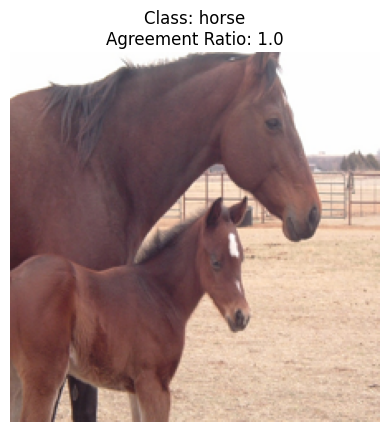

Loading: POETdataset/PascalImages/diningtable_2009_003991.jpg


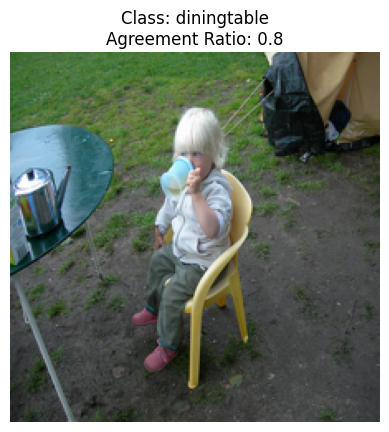

Loading: POETdataset/PascalImages/cat_2008_007873.jpg


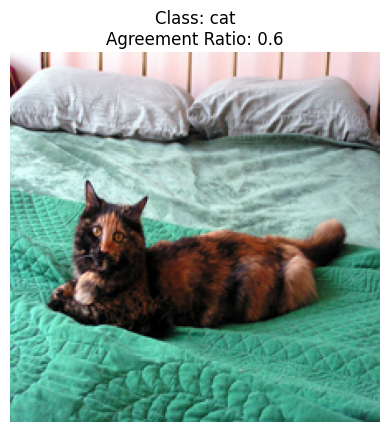

Loading: POETdataset/PascalImages/cat_2011_001534.jpg


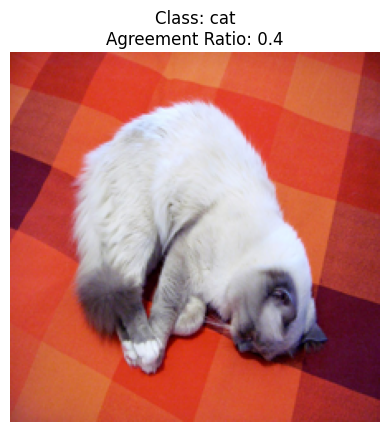

Loading: POETdataset/PascalImages/cat_2010_003050.jpg


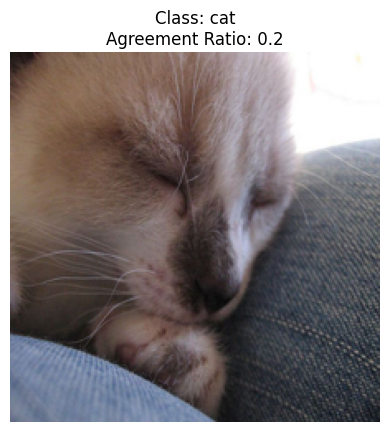

Loading: POETdataset/PascalImages/motorbike_2009_001135.jpg


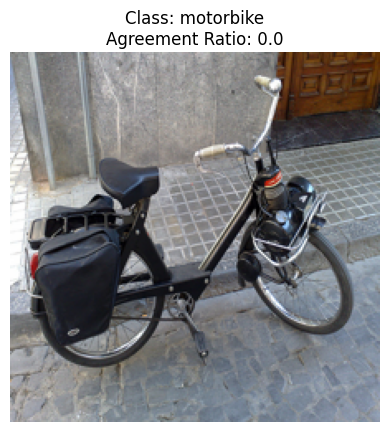

In [6]:
import zipfile
import random
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Path to the ZIP file
zip_file_path = "../POETdataset.zip"

# Clean up paths in the dataset (if necessary)
data['zip_file_path'] = data['zip_file_path'].str.replace('POETdataset.zip/', '', regex=False)

# Define the target size for resizing images
target_size = (224, 224)  # For example, 224x224 pixels

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Select six unique agreement ratios and random samples for each
    unique_ratios = agreement_ratios['agreement_ratio'].unique()
    selected_samples = []

    for ratio in sorted(unique_ratios, reverse=True)[:6]:  # Sort ratios descending and limit to 6
        # Filter images with the current ratio
        subset = data[data['agreement_ratio'] == ratio]
        # Randomly select one image
        random_sample = subset.sample(1).iloc[0]
        selected_samples.append(random_sample)

    # Sort the selected samples by their agreement ratio in descending order
    selected_samples.sort(key=lambda x: x['agreement_ratio'], reverse=True)

    for sample in selected_samples:
        # Load the image from the ZIP file
        img_path = sample['zip_file_path']
        print(f"Loading: {img_path}")  # Debug the path
        with z.open(img_path) as file:
            img_data = BytesIO(file.read())  # Keep the file data in memory
            img = Image.open(img_data)  # Open the image from memory
            
            # Resize the image to the target size
            img = img.resize(target_size)

        # Display the image
        plt.imshow(img)
        plt.axis('off')
        # Add title with class and agreement ratio
        plt.title(f"Class: {sample['class']}\nAgreement Ratio: {sample['agreement_ratio']}")
        
        # Show the image and wait for a key press to continue
        plt.show()
        input("Press Enter to continue to the next image...")


# Class ratio for each of the classes

In [7]:
# Group by agreement ratio and class, then count occurrences
misunderstood_counts = data.groupby(['agreement_ratio', 'class']).size().reset_index(name='count')

# Calculate the total count for each agreement ratio
total_counts = misunderstood_counts.groupby('agreement_ratio')['count'].transform('sum')

# Calculate the ratio for each class under a given agreement ratio
misunderstood_counts['ratio'] = misunderstood_counts['count'] / total_counts

# Display the result for all agreement ratios and classes
for ratio in misunderstood_counts['agreement_ratio'].unique():
    print(f"Agreement Ratio: {ratio}")
    subset = misunderstood_counts[misunderstood_counts['agreement_ratio'] == ratio]
    print(subset[['class', 'ratio']].sort_values(by='ratio', ascending=False))
    print("\n" + "-"*50 + "\n")

Agreement Ratio: 0.0
         class  ratio
4         sofa  0.500
0    aeroplane  0.125
1  diningtable  0.125
2          dog  0.125
3    motorbike  0.125

--------------------------------------------------

Agreement Ratio: 0.2
          class     ratio
8           dog  0.380952
5           cat  0.285714
7   diningtable  0.142857
10         sofa  0.095238
6           cow  0.047619
9     motorbike  0.047619

--------------------------------------------------

Agreement Ratio: 0.4
        class     ratio
16        dog  0.531758
14        cat  0.446086
18       sofa  0.007386
17  motorbike  0.004431
12    bicycle  0.002954
13       boat  0.002954
15        cow  0.002954
11  aeroplane  0.001477

--------------------------------------------------

Agreement Ratio: 0.6
          class     ratio
25          dog  0.302817
22          cat  0.225352
23          cow  0.091549
27    motorbike  0.091549
28         sofa  0.091549
21         boat  0.063380
24  diningtable  0.049296
19    aeroplane  0.

# Human-model agreement ratio

In [8]:
# Part 1: Calculate the overall ratio of correct and wrong labels
correct_labels = data[data['agreement'] == True]
wrong_labels = data[data['agreement'] == False]

# Calculate the ratio of correct to wrong labels
correct_ratio = len(correct_labels) / len(data)
wrong_ratio = len(wrong_labels) / len(data)

print(f"Agree ratio: {correct_ratio:.2f}")
print(f"Disagree ratio: {wrong_ratio:.2f}")
print("\n" + "-"*50 + "\n")

# Part 2: Calculate the ratio of correct and wrong labels for each class
correct_labels_by_class = correct_labels.groupby('class').size().reset_index(name='agree_count')
wrong_labels_by_class = wrong_labels.groupby('class').size().reset_index(name='disagree_count')
total_labels_by_class = data.groupby('class').size().reset_index(name='total_count')

# Merge the correct, wrong, and total counts for each class
class_ratios = pd.merge(correct_labels_by_class, total_labels_by_class, on='class')
class_ratios = pd.merge(class_ratios, wrong_labels_by_class, on='class', how='left')

# Fill NaN values in wrong_count with 0 (for cases where no wrong labels exist for a class)
class_ratios['disagree_count'].fillna(0, inplace=True)

# Calculate the ratio of correct and wrong labels for each class
class_ratios['agree_label_ratio'] = class_ratios['agree_count'] / class_ratios['total_count']
class_ratios['disagree_label_ratio'] = class_ratios['disagree_count'] / class_ratios['total_count']

# Display the result
print("Agree and disagree Label Ratios for Each Class:")
print(class_ratios[['class', 'agree_label_ratio', 'disagree_label_ratio']].sort_values(by='agree_label_ratio', ascending=False))

Agree ratio: 0.87
Disagree ratio: 0.13

--------------------------------------------------

Agree and disagree Label Ratios for Each Class:
         class  agree_label_ratio  disagree_label_ratio
0    aeroplane           0.992481              0.007519
7        horse           0.991649              0.008351
4          cow           0.979866              0.020134
8    motorbike           0.978431              0.021569
1      bicycle           0.977011              0.022989
5  diningtable           0.975709              0.024291
9         sofa           0.961456              0.038544
2         boat           0.955102              0.044898
3          cat           0.691395              0.308605
6          dog           0.686192              0.313808


C:\Users\magnu\AppData\Local\Temp\ipykernel_21780\1964363114.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_ratios['disagree_count'].fillna(0, inplace=True)



# Model detection ratios

In [9]:
# Part 1: Calculate the overall ratio of correct and incorrect model detections
correct_detection = data[data['model_detection'] == 1]
incorrect_detection = data[data['model_detection'] == 0]

# Calculate the ratio of correct to incorrect detections
correct_detection_ratio = len(correct_detection) / len(data)
incorrect_detection_ratio = len(incorrect_detection) / len(data)

print(f"Correct detections ratio: {correct_detection_ratio:.2f}")
print(f"Incorrect detections ratio: {incorrect_detection_ratio:.2f}")
print("\n" + "-"*50 + "\n")

# Part 2: Calculate the ratio of each class in correct detections
correct_detection_by_class = correct_detection.groupby('class').size().reset_index(name='correct_count')
total_detection_by_class = data.groupby('class').size().reset_index(name='total_count')

# Merge the correct counts with the total counts for each class
class_detection_ratios = pd.merge(correct_detection_by_class, total_detection_by_class, on='class')

# Calculate the ratio of correct detections for each class
class_detection_ratios['correct_detection_ratio'] = class_detection_ratios['correct_count'] / class_detection_ratios['total_count']

# Part 3: Calculate the ratio of each class in incorrect detections
incorrect_detection_by_class = incorrect_detection.groupby('class').size().reset_index(name='incorrect_count')

# Merge the incorrect counts with the total counts for each class
class_detection_ratios = pd.merge(class_detection_ratios, incorrect_detection_by_class, on='class', how='left')

# Fill NaN values in incorrect_count with 0 (for cases where no incorrect detections exist for a class)
class_detection_ratios['incorrect_count'].fillna(0, inplace=True)

# Calculate the ratio of incorrect detections for each class
class_detection_ratios['incorrect_detection_ratio'] = class_detection_ratios['incorrect_count'] / class_detection_ratios['total_count']

# Display the result
print("Detection Ratios for Each Class (Correct and Incorrect):")
print(class_detection_ratios[['class', 'correct_detection_ratio', 'incorrect_detection_ratio']].sort_values(by='correct_detection_ratio', ascending=False))

Correct detections ratio: 0.98
Incorrect detections ratio: 0.02

--------------------------------------------------

Detection Ratios for Each Class (Correct and Incorrect):
         class  correct_detection_ratio  incorrect_detection_ratio
0    aeroplane                 0.992481                   0.007519
7        horse                 0.991649                   0.008351
6          dog                 0.986611                   0.013389
3          cat                 0.986152                   0.013848
8    motorbike                 0.984314                   0.015686
5  diningtable                 0.983806                   0.016194
4          cow                 0.983221                   0.016779
1      bicycle                 0.980843                   0.019157
9         sofa                 0.980728                   0.019272
2         boat                 0.959184                   0.040816


C:\Users\magnu\AppData\Local\Temp\ipykernel_21780\3205487169.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_detection_ratios['incorrect_count'].fillna(0, inplace=True)


In [10]:
import pandas as pd

# Step 1: Calculate correct votes for each class
correct_majority_vote = data[data['model_detection'] == 1]
correct_votes_by_class = correct_majority_vote.groupby('class').size().reset_index(name='correct_count')

# Step 2: Calculate total votes for each class
total_votes_by_class = data.groupby('class').size().reset_index(name='total_count')

# Step 3: Merge correct counts with total counts
class_accuracy = pd.merge(correct_votes_by_class, total_votes_by_class, on='class')

# Step 4: Calculate accuracy for each class
class_accuracy['accuracy'] = class_accuracy['correct_count'] / class_accuracy['total_count']

# Step 5: Display the results
print("Class-wise Accuracy:")
print(class_accuracy[['class', 'accuracy']].sort_values(by='accuracy', ascending=False))

Class-wise Accuracy:
         class  accuracy
0    aeroplane  0.992481
7        horse  0.991649
6          dog  0.986611
3          cat  0.986152
8    motorbike  0.984314
5  diningtable  0.983806
4          cow  0.983221
1      bicycle  0.980843
9         sofa  0.980728
2         boat  0.959184


# Human Detection Ratios

In [11]:
# Part 1: Calculate the overall ratio of correct and incorrect majority votes
correct_majority_vote = data[data['majority_vote'] == 1]
incorrect_majority_vote = data[data['majority_vote'] == 0]

# Calculate the ratio of correct to incorrect majority votes
correct_majority_vote_ratio = len(correct_majority_vote) / len(data)
incorrect_majority_vote_ratio = len(incorrect_majority_vote) / len(data)

print(f"Correct majority votes ratio: {correct_majority_vote_ratio:.2f}")
print(f"Incorrect majority votes ratio: {incorrect_majority_vote_ratio:.2f}")
print("\n" + "-"*50 + "\n")

# Part 2: Calculate the ratio of each class in correct majority votes
correct_majority_vote_by_class = correct_majority_vote.groupby('class').size().reset_index(name='correct_count')
total_majority_vote_by_class = data.groupby('class').size().reset_index(name='total_count')

# Merge the correct counts with the total counts for each class
class_majority_vote_ratios = pd.merge(correct_majority_vote_by_class, total_majority_vote_by_class, on='class')

# Calculate the ratio of correct majority votes for each class
class_majority_vote_ratios['correct_majority_vote_ratio'] = class_majority_vote_ratios['correct_count'] / class_majority_vote_ratios['total_count']

# Part 3: Calculate the ratio of each class in incorrect majority votes
incorrect_majority_vote_by_class = incorrect_majority_vote.groupby('class').size().reset_index(name='incorrect_count')

# Merge the incorrect counts with the total counts for each class
class_majority_vote_ratios = pd.merge(class_majority_vote_ratios, incorrect_majority_vote_by_class, on='class', how='left')

# Fill NaN values in incorrect_count with 0 (for cases where no incorrect majority votes exist for a class)
class_majority_vote_ratios['incorrect_count'].fillna(0, inplace=True)

# Calculate the ratio of incorrect majority votes for each class
class_majority_vote_ratios['incorrect_majority_vote_ratio'] = class_majority_vote_ratios['incorrect_count'] / class_majority_vote_ratios['total_count']

# Display the result
print("Majority Vote Ratios for Each Class (Correct and Incorrect):")
print(class_majority_vote_ratios[['class', 'correct_majority_vote_ratio', 'incorrect_majority_vote_ratio']].sort_values(by='correct_majority_vote_ratio', ascending=False))

Correct majority votes ratio: 0.88
Incorrect majority votes ratio: 0.12

--------------------------------------------------

Majority Vote Ratios for Each Class (Correct and Incorrect):
         class  correct_majority_vote_ratio  incorrect_majority_vote_ratio
7        horse                     1.000000                       0.000000
0    aeroplane                     0.996992                       0.003008
1      bicycle                     0.996169                       0.003831
2         boat                     0.995918                       0.004082
5  diningtable                     0.991903                       0.008097
8    motorbike                     0.990196                       0.009804
4          cow                     0.989933                       0.010067
9         sofa                     0.976445                       0.023555
3          cat                     0.695351                       0.304649
6          dog                     0.691213                     

C:\Users\magnu\AppData\Local\Temp\ipykernel_21780\653631515.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_majority_vote_ratios['incorrect_count'].fillna(0, inplace=True)


In [12]:
import pandas as pd

# Step 1: Calculate correct votes for each class
correct_majority_vote = data[data['majority_vote'] == 1]
correct_votes_by_class = correct_majority_vote.groupby('class').size().reset_index(name='correct_count')

# Step 2: Calculate total votes for each class
total_votes_by_class = data.groupby('class').size().reset_index(name='total_count')

# Step 3: Merge correct counts with total counts
class_accuracy = pd.merge(correct_votes_by_class, total_votes_by_class, on='class')

# Step 4: Calculate accuracy for each class
class_accuracy['accuracy'] = class_accuracy['correct_count'] / class_accuracy['total_count']

# Step 5: Display the results
print("Class-wise Accuracy:")
print(class_accuracy[['class', 'accuracy']].sort_values(by='accuracy', ascending=False))


Class-wise Accuracy:
         class  accuracy
7        horse  1.000000
0    aeroplane  0.996992
1      bicycle  0.996169
2         boat  0.995918
5  diningtable  0.991903
8    motorbike  0.990196
4          cow  0.989933
9         sofa  0.976445
3          cat  0.695351
6          dog  0.691213


# Model and Human differences => Visually

Loading: POETdataset/PascalImages/cat_2010_004448.jpg
Loading: POETdataset/PascalImages/cat_2010_006011.jpg
Loading: POETdataset/PascalImages/dog_2010_001635.jpg
Loading: POETdataset/PascalImages/boat_2010_005588.jpg


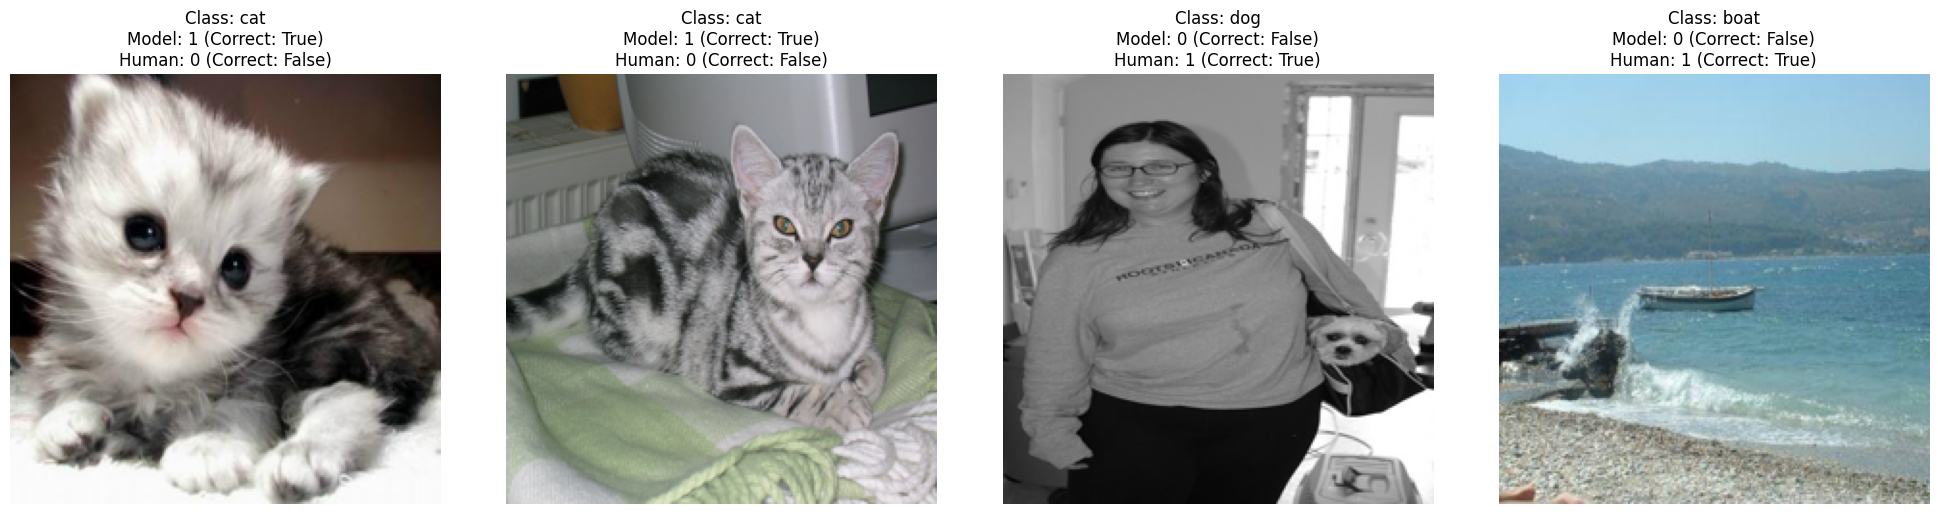

In [13]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Assuming data is already loaded in 'data' dataframe
# Path to the ZIP file
zip_file_path = "../POETdataset.zip"

# Clean up paths in the dataset (if necessary)
data['zip_file_path'] = data['zip_file_path'].str.replace('POETdataset.zip/', '', regex=False)

# Filter the dataset based on the criteria
# 1. Model correct, human wrong
model_correct_human_wrong = data[(data['model_detection'] == 1) & (data['majority_vote'] == 0)]

# 2. Model wrong, human correct
model_wrong_human_correct = data[(data['model_detection'] == 0) & (data['majority_vote'] == 1)]

# Select two random samples from each category
random_model_correct_human_wrong = model_correct_human_wrong.sample(2)
random_model_wrong_human_correct = model_wrong_human_correct.sample(2)

# Combine the selected samples into one list
selected_samples = pd.concat([random_model_correct_human_wrong, random_model_wrong_human_correct])

# Define the target size for resizing images
target_size = (224, 224)  # Example size

# Open the ZIP file and load the images
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Create a 1x4 subplot
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes = axes.flatten()

    for ax, sample in zip(axes, selected_samples.iterrows()):
        index, sample = sample
        img_path = sample['zip_file_path']
        print(f"Loading: {img_path}")  # Debugging print statement

        # Load the image from the ZIP file
        with z.open(img_path) as file:
            img_data = BytesIO(file.read())  # Keep the file data in memory
            img = Image.open(img_data)  # Open the image from memory
            
            # Resize the image to the target size
            img = img.resize(target_size)

        # Display the image
        ax.imshow(img)
        ax.axis('off')

        # Add title with class, model detection, and majority vote info
        ax.set_title(f"Class: {sample['class']}\n"
                    f"Model: {sample['model_detection']} (Correct: {sample['model_detection'] == 1})\n"
                    f"Human: {sample['majority_vote']} (Correct: {sample['majority_vote'] == 1})")

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

Loading: POETdataset/PascalImages/cat_2010_004501.jpg
Class: cat


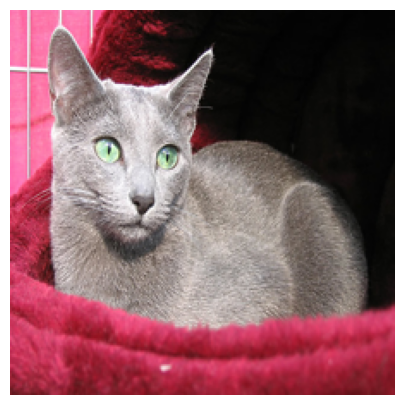

Loading: POETdataset/PascalImages/dog_2010_004224.jpg
Class: dog


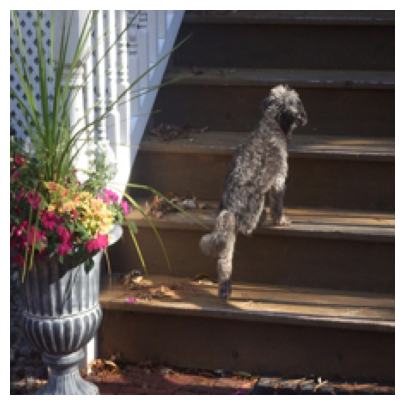

Loading: POETdataset/PascalImages/bicycle_2008_008069.jpg
Class: bicycle


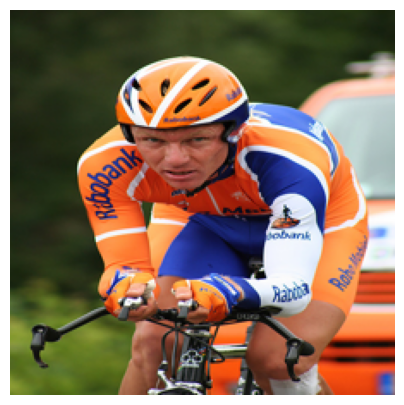

Loading: POETdataset/PascalImages/boat_2011_000683.jpg
Class: boat


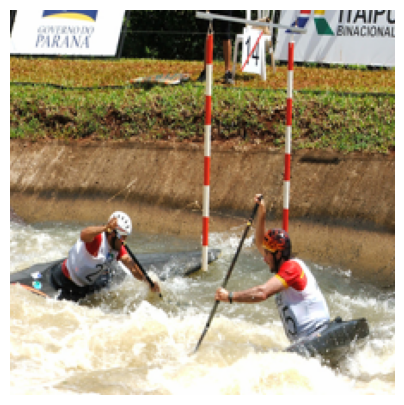

In [14]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Assuming data is already loaded in 'data' dataframe
# Path to the ZIP file
zip_file_path = "../POETdataset.zip"

# Clean up paths in the dataset (if necessary)
data['zip_file_path'] = data['zip_file_path'].str.replace('POETdataset.zip/', '', regex=False)

# Filter the dataset based on the criteria
# 1. Model correct, human wrong
model_correct_human_wrong = data[(data['model_detection'] == 1) & (data['majority_vote'] == 0)]

# 2. Model wrong, human correct
model_wrong_human_correct = data[(data['model_detection'] == 0) & (data['majority_vote'] == 1)]

# Select two random samples from each category
random_model_correct_human_wrong = model_correct_human_wrong.sample(2)
random_model_wrong_human_correct = model_wrong_human_correct.sample(2)

# Combine the selected samples into one list
selected_samples = pd.concat([random_model_correct_human_wrong, random_model_wrong_human_correct])

# Define the target size for resizing images
target_size = (224, 224)  # Example size

# Open the ZIP file and load the images
with zipfile.ZipFile(zip_file_path, 'r') as z:
    for i, sample in selected_samples.iterrows():
        img_path = sample['zip_file_path']
        print(f"Loading: {img_path}")  # Debugging print statement

        # Load the image from the ZIP file
        with z.open(img_path) as file:
            img_data = BytesIO(file.read())  # Keep the file data in memory
            img = Image.open(img_data)  # Open the image from memory
            
            # Resize the image to the target size
            img = img.resize(target_size)

        print(f"Class: {sample['class']}")

        # Display the image
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.axis('off')
        # plt.title(f"Class: {sample['class']}\n"
        #           f"Model: {sample['model_detection']} (Correct: {sample['model_detection'] == 1})\n"
        #           f"Human: {sample['majority_vote']} (Correct: {sample['majority_vote'] == 1})")
        plt.show()

        # Save each image if required (uncomment below line to enable saving)
        # img.save(f"output_image_{i}.png")


# Human Model Agreement

In [15]:
import pandas as pd

# Sample DataFrame structure
# data = pd.DataFrame({
#     'class': [...],
#     'agreement': [...]
# })

# Step 1: Calculate overall agreement
overall_agreement = data['agreement'].mean()

# Step 2: Calculate in-class agreement
# Filter rows where agreement is True and group by class to count agreements
agreement_by_class = data[data['agreement']].groupby('class').size().reset_index(name='agreement_count')

# Count total rows per class
total_by_class = data.groupby('class').size().reset_index(name='total_count')

# Merge agreements with total counts
class_agreement = pd.merge(agreement_by_class, total_by_class, on='class', how='right')

# Fill NaN values in agreement_count (classes with no agreements) with 0
class_agreement['agreement_count'].fillna(0, inplace=True)

# Calculate in-class agreement ratio
class_agreement['in_class_agreement'] = class_agreement['agreement_count'] / class_agreement['total_count']

# Step 3: Display results
print(f"Overall Agreement: {overall_agreement:.3f}")
print("\nIn-Class Agreement:")
print(class_agreement[['class', 'in_class_agreement']].sort_values(by='in_class_agreement', ascending=False))


Overall Agreement: 0.873

In-Class Agreement:
         class  in_class_agreement
0    aeroplane            0.992481
7        horse            0.991649
4          cow            0.979866
8    motorbike            0.978431
1      bicycle            0.977011
5  diningtable            0.975709
9         sofa            0.961456
2         boat            0.955102
3          cat            0.691395
6          dog            0.686192


C:\Users\magnu\AppData\Local\Temp\ipykernel_21780\1272006839.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  class_agreement['agreement_count'].fillna(0, inplace=True)


# Class Specific f1 for Model

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Finding the unique classes
classes = data['class'].unique()
print(f"Unique Classes: {classes}")

# Holder for the results
results_model = []

# Go through the classes
for c in classes:
    class_data = data[data['class'] == c]
    print(len(class_data))

    # Defining the data for comparison
    y_true = [1] * len(class_data)
    y_pred = class_data['model_detection']
    print(f"y_true: {len(y_true)}, y_pred: {len(y_pred)}") 

    # Calculate precision, recall, and f1
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Occupy the data
    results_model.append({
        "class": c,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

# Convert to dataframe and show
f1_results = pd.DataFrame(results_model)
print(f1_results)


Unique Classes: ['boat' 'horse' 'cow' 'dog' 'aeroplane' 'diningtable' 'cat' 'motorbike'
 'bicycle' 'sofa']
490
y_true: 490, y_pred: 490
479
y_true: 479, y_pred: 479
298
y_true: 298, y_pred: 298
1195
y_true: 1195, y_pred: 1195
665
y_true: 665, y_pred: 665
494
y_true: 494, y_pred: 494
1011
y_true: 1011, y_pred: 1011
510
y_true: 510, y_pred: 510
522
y_true: 522, y_pred: 522
467
y_true: 467, y_pred: 467
         class  precision    recall        f1
0         boat        1.0  0.959184  0.979167
1        horse        1.0  0.991649  0.995807
2          cow        1.0  0.983221  0.991540
3          dog        1.0  0.986611  0.993260
4    aeroplane        1.0  0.992481  0.996226
5  diningtable        1.0  0.983806  0.991837
6          cat        1.0  0.986152  0.993028
7    motorbike        1.0  0.984314  0.992095
8      bicycle        1.0  0.980843  0.990329
9         sofa        1.0  0.980728  0.990270


# Per viwer accuracy

In [17]:
import ast
data['responses'] = data['responses'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [18]:
num_annotatators = len(data['responses'][0])
num_annotatators

5

In [22]:
# Extract the number of annotators from the "responses" column
num_annotators = len(data['responses'][0])

# Initialize dictionaries to store the overall and per-class accuracies
annotator_overall_accuracy = {f'Annotator_{i}': 0 for i in range(num_annotators)}
annotator_class_accuracy = {f'Annotator_{i}': {} for i in range(num_annotators)}

# Iterate over each annotator
for i in range(num_annotators):
    total_annotations = 0
    correct_annotations = 0
    class_correct = {}
    class_total = {}

    for _, row in data.iterrows():
        # Extract annotator response and ground truth (majority_vote)
        annotator_response = row['responses'][i]
        ground_truth = 1 #row['majority_vote']
        image_class = row['class']

        # Update overall counts
        total_annotations += 1
        if annotator_response == ground_truth:
            correct_annotations += 1

        # Update per-class counts
        if image_class not in class_total:
            class_total[image_class] = 0
            class_correct[image_class] = 0

        class_total[image_class] += 1
        if annotator_response == ground_truth:
            class_correct[image_class] += 1

    # Calculate overall accuracy for the annotator
    annotator_overall_accuracy[f'Annotator_{i}'] = correct_annotations / total_annotations

    # Calculate per-class accuracy for the annotator
    for image_class in class_total:
        annotator_class_accuracy[f'Annotator_{i}'][image_class] = (
            class_correct[image_class] / class_total[image_class]
        )

# Display results
print("Overall Accuracy for each Annotator:")
for annotator, accuracy in annotator_overall_accuracy.items():
    print(f"{annotator}: {accuracy:.3f}")

print("\nDetection Ratios for Each Class (Correct and Incorrect):")
for annotator, class_accuracies in annotator_class_accuracy.items():
    print(f"{annotator}:")
    results = []
    for image_class, correct_ratio in class_accuracies.items():
        incorrect_ratio = 1 - correct_ratio
        results.append({
            "class": image_class,
            "correct_detection_ratio": correct_ratio,
            "incorrect_detection_ratio": incorrect_ratio
        })
    df = pd.DataFrame(results).sort_values(by="correct_detection_ratio", ascending=False)
    print(df)


Overall Accuracy for each Annotator:
Annotator_0: 0.966
Annotator_1: 0.974
Annotator_2: 0.839
Annotator_3: 0.845
Annotator_4: 0.864

Detection Ratios for Each Class (Correct and Incorrect):
Annotator_0:
         class  correct_detection_ratio  incorrect_detection_ratio
4    aeroplane                 0.993985                   0.006015
1        horse                 0.983299                   0.016701
3          dog                 0.982427                   0.017573
6          cat                 0.978239                   0.021761
5  diningtable                 0.965587                   0.034413
0         boat                 0.965306                   0.034694
8      bicycle                 0.950192                   0.049808
7    motorbike                 0.943137                   0.056863
9         sofa                 0.942184                   0.057816
2          cow                 0.875839                   0.124161
Annotator_1:
         class  correct_detection_ratio  incorr